# Housing Analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, Lasso, ElasticNet
from sklearn.model_selection import KFold, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
rng = np.random.default_rng(1) 
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [9]:
# read in dataset and ensure proper structure
houses = pd.read_csv("house.csv")
houses.head()

,Id,MSSubClass,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SalePrice
0,1,60,8450,1Fam,2Story,7,5,2003,2003,Gd,TA,PConc,Gd,TA,856,Ex,856,854,1710,2,1,3,Gd,8,Typ,0,NaN,2,548,TA,TA,0,61,0,0,0,2008,208500
1,2,20,9600,1Fam,1Story,6,8,1976,1976,TA,TA,CBlock,Gd,TA,1262,Ex,1262,0,1262,2,0,3,TA,6,Typ,1,TA,2,460,TA,TA,298,0,0,0,0,2007,181500
2,3,60,11250,1Fam,2Story,7,5,2001,2002,Gd,TA,PConc,Gd,TA,920,Ex,920,866,1786,2,1,3,Gd,6,Typ,1,TA,2,608,TA,TA,0,42,0,0,0,2008,223500
3,4,70,9550,1Fam,2Story,7,5,1915,1970,TA,TA,BrkTil,TA,Gd,756,Gd,961,756,1717,1,0,3,Gd,7,Typ,1,Gd,3,642,TA,TA,0,35,272,0,0,2006,140000
4,5,60,14260,1Fam,2Story,8,5,2000,2000,Gd,TA,PConc,Gd,TA,1145,Ex,1145,1053,2198,2,1,4,Gd,9,Typ,1,TA,3,836,TA,TA,192,84,0,0,0,2008,250000


In [42]:
# pull structural information from the data
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   BldgType       1460 non-null   object
 4   HouseStyle     1460 non-null   object
 5   OverallQual    1460 non-null   int64 
 6   OverallCond    1460 non-null   int64 
 7   YearBuilt      1460 non-null   int64 
 8   YearRemodAdd   1460 non-null   int64 
 9   ExterQual      1460 non-null   object
 10  ExterCond      1460 non-null   object
 11  Foundation     1460 non-null   object
 12  BsmtQual       1423 non-null   object
 13  BsmtCond       1423 non-null   object
 14  TotalBsmtSF    1460 non-null   int64 
 15  HeatingQC      1460 non-null   object
 16  1stFlrSF       1460 non-null   int64 
 17  2ndFlrSF       1460 non-null   int64 
 18  GrLivArea      1460 non-null

From the information above, we see that there are 1,460 observations and 38 variables. Of these variables, 13 are categorical and 25 are numeric. 

In [43]:
# check number of missing values by column
houses.isnull().sum(axis=0)

Id                 0
MSSubClass         0
LotArea            0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond        81
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
YrSold             0
SalePrice          0
dtype: int64

From the infomation above, we see that there are 37 missing values in basement quality and condition, there are 690 missing values in fireplace quality, and there are 81 missing values in garage quality and condition.

## Preprocessing

1. MSSubClass is the categorical variable that records the type of dwelling. However, it is read as an integer. Change the variable type to object.

In [44]:
# convert MSSubClass from int to object
houses['MSSubClass'] = houses['MSSubClass'].astype(object)

2. There are 13 variables imported as object, except for MSSubClass. Classify them if they are ordinal or nominal.
* Ordinal: ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageQual, GarageCond
* Nominal: BldgType, HouseStyle, Foundation, MSSubClass

3. Encode 13 categorical variables accordingly.

In [45]:
# create the category ordering for the ordinal variables
common_order = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
functional_order = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

# set NA values to 'None'
houses = houses.fillna("None")

# transform columns
categorical_transform= ColumnTransformer(
    [
        ('ExterQual', OrdinalEncoder(categories=[common_order]), ['ExterQual']),
        ('ExterCond', OrdinalEncoder(categories=[common_order]), ['ExterCond']),
        ('BsmtQual', OrdinalEncoder(categories=[common_order]), ['BsmtQual']),
        ('BsmtCond', OrdinalEncoder(categories=[common_order]), ['BsmtCond']),
        ('HeatingQC', OrdinalEncoder(categories=[common_order]), ['HeatingQC']),
        ('KitchenQual', OrdinalEncoder(categories=[common_order]), ['KitchenQual']),
        ('Functional', OrdinalEncoder(categories=[functional_order]), ['Functional']),
        ('FireplaceQu', OrdinalEncoder(categories=[common_order]), ['FireplaceQu']),
        ('GarageQual', OrdinalEncoder(categories=[common_order]), ['GarageQual']),
        ('GarageCond', OrdinalEncoder(categories=[common_order]), ['GarageCond']),
        ('BldgType', OneHotEncoder(dtype='int', sparse_output=False), ['BldgType']),
        ('HouseStyle', OneHotEncoder(dtype='int', sparse_output=False), ['HouseStyle']),
        ('Foundation', OneHotEncoder(dtype='int', sparse_output=False), ['Foundation']),
        ('MSSubClass', OneHotEncoder(dtype='int', sparse_output=False), ['MSSubClass']),

    ],
    remainder='passthrough', verbose_feature_names_out=False
)

# set the output of the columntransformer to a pandas df
categorical_transform.set_output(transform='pandas')

transformed_houses = categorical_transform.fit_transform(houses)

4. WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, and ScreenPorch report the size of different types of porch areas. Create a new variable Porch, which contains the information about the total porch area size (regardless of the porch types). After creating Porch, remove the five varibles.

In [46]:
# perform pairwise addition across columns
transformed_houses['Porch'] = transformed_houses['WoodDeckSF'] + transformed_houses['OpenPorchSF'] + transformed_houses['EnclosedPorch'] + transformed_houses['3SsnPorch'] + transformed_houses['ScreenPorch']
# drop unneeded columns
drop_houses = transformed_houses.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)

5. Inflation also needs to be considered for SalePrice. First, import inflation.csv file. Write a function to adjust the SalePrice of homes sold prior to 2010, aligning them with 2010 values by applying inflation rates. For example, let's assume that the inflation rates in 2008 and 2009 were 2% and 2.5%, respectively. The house with the sale price of \\$$100,000$ in 2007 has the same value of \\$$100,000\times1.02\times1.025$ in 2010. Create a variable SalePriceAdj, which displays the 2010 inflation-adjusted price.

In [47]:
inflation = pd.read_csv('/Users/colewagner632/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/STAT 6309/Data/inflation.csv', skiprows=3)
inflation.columns = ['year', 'inflation_rate']
# only extract inflation rates from before 2010
rel_inflation = inflation[inflation.year < 2010]
# format inflation rates for calculation
rel_inflation['inflation_rate'] = (rel_inflation.inflation_rate / 100) + 1

In [48]:
# subset data to only get houses sold before 2010
old_houses = drop_houses.loc[drop_houses['YrSold'] < 2010]

# create our new column and set all values to 0
old_houses.loc[:, 'SalePriceAdj'] = 0

# calculate adjusted sale price for each house
for i in range(len(old_houses['SalePriceAdj'])):
    temp_yrsold = old_houses.loc[old_houses.index[i], 'YrSold']
    adj_inds = rel_inflation.index[rel_inflation.year > temp_yrsold]
    adj_val = rel_inflation.inflation_rate[adj_inds].product()
    old_houses.loc[old_houses.index[i], 'SalePriceAdj'] = old_houses.loc[old_houses.index[i], 'SalePrice'] * adj_val

# format adjusted data for join
adj_join = old_houses[['Id', 'SalePriceAdj']]

# join adjusted sale price to full data
adj_houses = pd.merge(drop_houses, adj_join, how='left', on='Id')
# replace NaNs with the nonadjusted sale price
adj_houses['SalePriceAdj'] = adj_houses['SalePriceAdj'].fillna(adj_houses['SalePrice'])

6. Conduct at least two hypothesis tests to see if SalePriceAdj follows a normal distribution or not. Also, draw a qq-plot. 

In [49]:
# normalize salepriceadj
normal_sale = (adj_houses['SalePriceAdj'] - adj_houses['SalePriceAdj'].mean()) / adj_houses['SalePriceAdj'].std()

**Kolmogorov-Smirnov test**

H0: The CDF of SalePriceAdj = The CDF of the normal distribution \
Ha: The CDF of SalePriceAdj does not equal The CDF of the normal distribution

In [50]:
ksstat, pval = stats.ks_1samp(normal_sale, stats.norm.cdf)
pval

3.934742649517639e-20

At the 0.05 level of significance, there is not sufficient evidence to conclude that SalePriceAdj follows a normal distribution (p is approximately 0 from a KS test).

**Normality Test**

H0: SalePriceAdj follows a normal distribution \
Ha: SalePriceAdj does not follow a normal distribution

In [51]:
normstat, pval = stats.normaltest(normal_sale)
pval

1.4137482666139214e-135

At the 0.05 level of significance, there is not sufficient evidence to conclude that SalePriceAdj follows a normal distribution (p is approximately 0 from a normality test).

**QQ Plot**

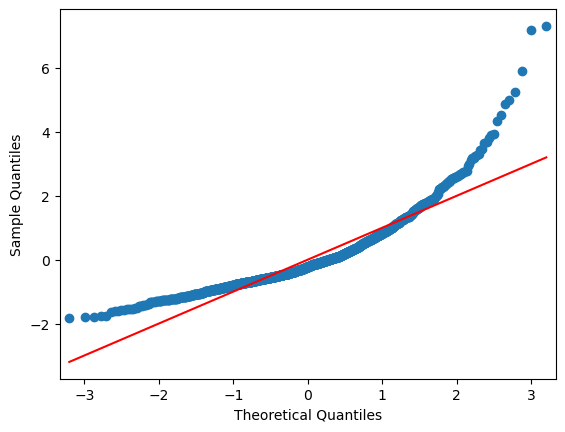

In [52]:
sm.qqplot(normal_sale, line='s')
pylab.show()

Here we see a clear curve in the QQ plot, further proving that SalePriceAdj does not follow a normal distribution.

7. Create a new variable logSalePriceAdj, which is log-scale SalePriceAdj, and check it follows a normal distribution using the same methods used above.

In [53]:
adj_houses['logSalePriceAdj'] = np.log(adj_houses['SalePriceAdj'])
# normalize the data to get mean 0 and std 1
normal_logsale = (adj_houses['logSalePriceAdj'] - adj_houses['logSalePriceAdj'].mean()) / adj_houses['logSalePriceAdj'].std()

**Kolmogorov-Smirnov test**

H0: The CDF of logSalePriceAdj = The CDF of the normal distribution \
Ha: logSalePriceAdj does not follow a normal distribution

In [54]:
ksstat, pval = stats.ks_1samp(normal_logsale, stats.norm.cdf)
pval

0.01326274032554738

At the 0.05 level of significance, there is not sufficient evidence to conclude that logSalePriceAdj follows a normal distribution (p = 0.013 from a KS test). It is important to note that this p value is much higher than the nonlogged sale price.

**Normality Test**

H0: logSalePriceAdj follows a normal distribution \
Ha: logSalePriceAdj does not follow a normal distribution

In [55]:
normstat, pval = stats.normaltest(normal_logsale)
pval

2.586683847162377e-06

At the 0.05 level of significance, there is not sufficient evidence to conclude that SalePriceAdj follows a normal distribution (p is approximately 0 from a normality test). Once again, this p value is much higher than before the log transformation

**QQ Plot**

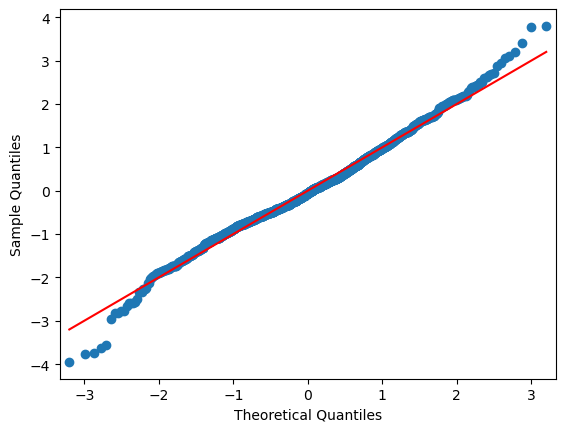

In [56]:
sm.qqplot(normal_logsale, line='s')
pylab.show()

Here we see that there is no extreme, systematic deviation from the 45 degree line. This plot certainly shows that the normality assumption is reasonable for logSalePriceAdj.

8. Standardize the continuous variables (area and size in this dataset).

In [57]:
# apply standardscaler to all continuous variables
standard_transform= ColumnTransformer(
    [
        ('LotArea', StandardScaler(), ['LotArea']),
        ('TotalBsmtSF', StandardScaler(), ['TotalBsmtSF']),
        ('1stFlrSF', StandardScaler(), ['1stFlrSF']),
        ('2ndFlrSF', StandardScaler(), ['2ndFlrSF']),
        ('GrLivArea', StandardScaler(), ['GrLivArea']),
        ('GarageArea', StandardScaler(), ['GarageArea']),
        ('Porch', StandardScaler(), ['Porch'])
    ],
    remainder='passthrough', verbose_feature_names_out=False
)

# set the output of the columntransformer to a pandas df
standard_transform.set_output(transform='pandas')

standard_houses = standard_transform.fit_transform(adj_houses)


## Data Summary
1. What is the most common type of dwelling (MSSubClass)? Also, create a bar plot.

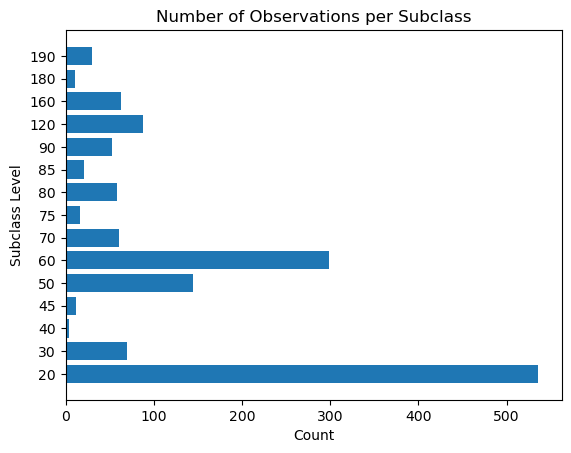

In [58]:
# subset the data to only contain MSSubClass variables
subclasses = ['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
             'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
             'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
             'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
             'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190']

subclass_data = standard_houses[subclasses]

# compute sums for each column and store in a dataframe
subclass_counts = subclass_data.sum(axis=0).to_frame()
subclass_counts.columns = ['n']
# create bar plot
tidy_subclasses = ['20', '30', '40', '45', '50', '60', '70', '75', '80',
                  '85', '90', '120', '160', '180', '190']

fig, ax = plt.subplots()
plt.barh(range(len(subclass_counts['n'])), subclass_counts['n'])
ax.set_yticks(range(len(subclass_counts.index)))
ax.set_yticklabels(tidy_subclasses)
plt.xlabel("Count")
plt.ylabel("Subclass Level")
plt.title("Number of Observations per Subclass")
plt.show()

Note, there is no bar for MSSubClass = 150 because there are none such values in the dataset.
From this barplot, we can see that a one story home that is built after 1946 (MSSubClass = 20) is the most common type of dwelling in the data.

2. We want to check whether a preferred foundation of a house has been changed over time. Create a plot that compares the proportions of foundations (variable Foundation) for six decades: (i) before 1959, (ii) 1960's (from 1960 to 1969), (iii) 1970's, (iv) 1980's, (v) 1990's, and (vi) 2000's (from 2000 to 2009). Disregard the houses built in 2010. Briefly explain if there is a trend.

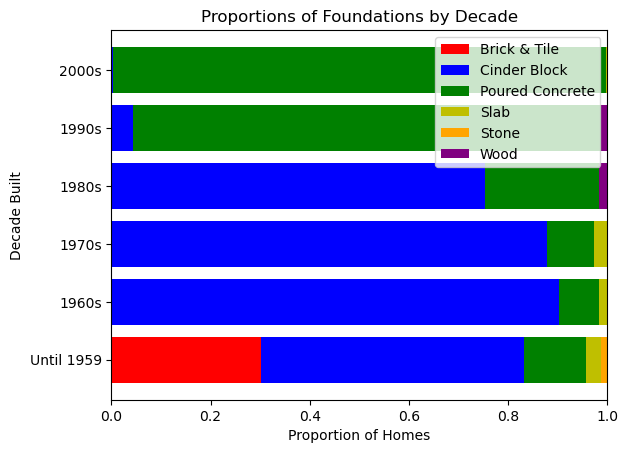

In [59]:
# create bins for yearbuilt
yrbins = [0, 1959, 1969, 1979, 1989, 1999, 2009]
# subset data to only include relevant houses
oldbuilt_houses = standard_houses.loc[standard_houses['YearBuilt'] < 2010]
# bin houses
oldbuilt_houses['yrbin'] = pd.cut(oldbuilt_houses['YearBuilt'], yrbins)
# extract only relevant variables
bins_foundations = ['yrbin', 'Foundation_BrkTil', 'Foundation_CBlock',
                   'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
                   'Foundation_Wood']

subset_oldbuilt = oldbuilt_houses[bins_foundations]

# extract proportions 
bin_props = (subset_oldbuilt.groupby('yrbin').sum()) / subset_oldbuilt.groupby('yrbin').count()

# create stacked barplot
x = [str(interval) for interval in bin_props.index]
BrkTil_y = bin_props.iloc[:, 0]
CBlock_y = bin_props.iloc[:, 1]
PConc_y = bin_props.iloc[:, 2]
Slab_y = bin_props.iloc[:, 3]
Stone_y = bin_props.iloc[:, 4]
Wood_y = bin_props.iloc[:, 5]


fig, ax = plt.subplots()
plt.barh(x, BrkTil_y, color = 'r')
plt.barh(x, CBlock_y, left=BrkTil_y, color='b')
plt.barh(x, PConc_y, left=BrkTil_y + CBlock_y, color='g')
plt.barh(x, Slab_y, left=BrkTil_y + CBlock_y + PConc_y, color='y')
plt.barh(x, Stone_y, left=BrkTil_y + CBlock_y + PConc_y + Slab_y, color='orange')
plt.barh(x, Wood_y, left=BrkTil_y + CBlock_y + PConc_y + Slab_y + Stone_y, color='purple')
plt.legend(['Brick & Tile', 'Cinder Block', 'Poured Concrete',
           'Slab', 'Stone', 'Wood'], loc='upper right')
plt.xlabel('Proportion of Homes')
plt.ylabel('Decade Built')
ax.set_yticklabels(['Until 1959', '1960s', '1970s', '1980s', '1990s', '2000s'])
plt.title("Proportions of Foundations by Decade")
plt.show()

There is a definite trend of foundation style as the decades progress. Before 1959 is the only time brick and tile foundations are featured. In the 60s and 70s, cinder block foundations were the most popular by far. The same is true in the 80s, but poured concrete also began taking a larger proportion of the market. From the 90s on, poured concrete was used in the overwhelming majority of cases.

## Regression
1. We wan to predict the logSalePriceAdj using other variables. Let's see which variables are highly correlated with logSalePriceAdj. Compute a correlation matrix and plot it using a heatmap.

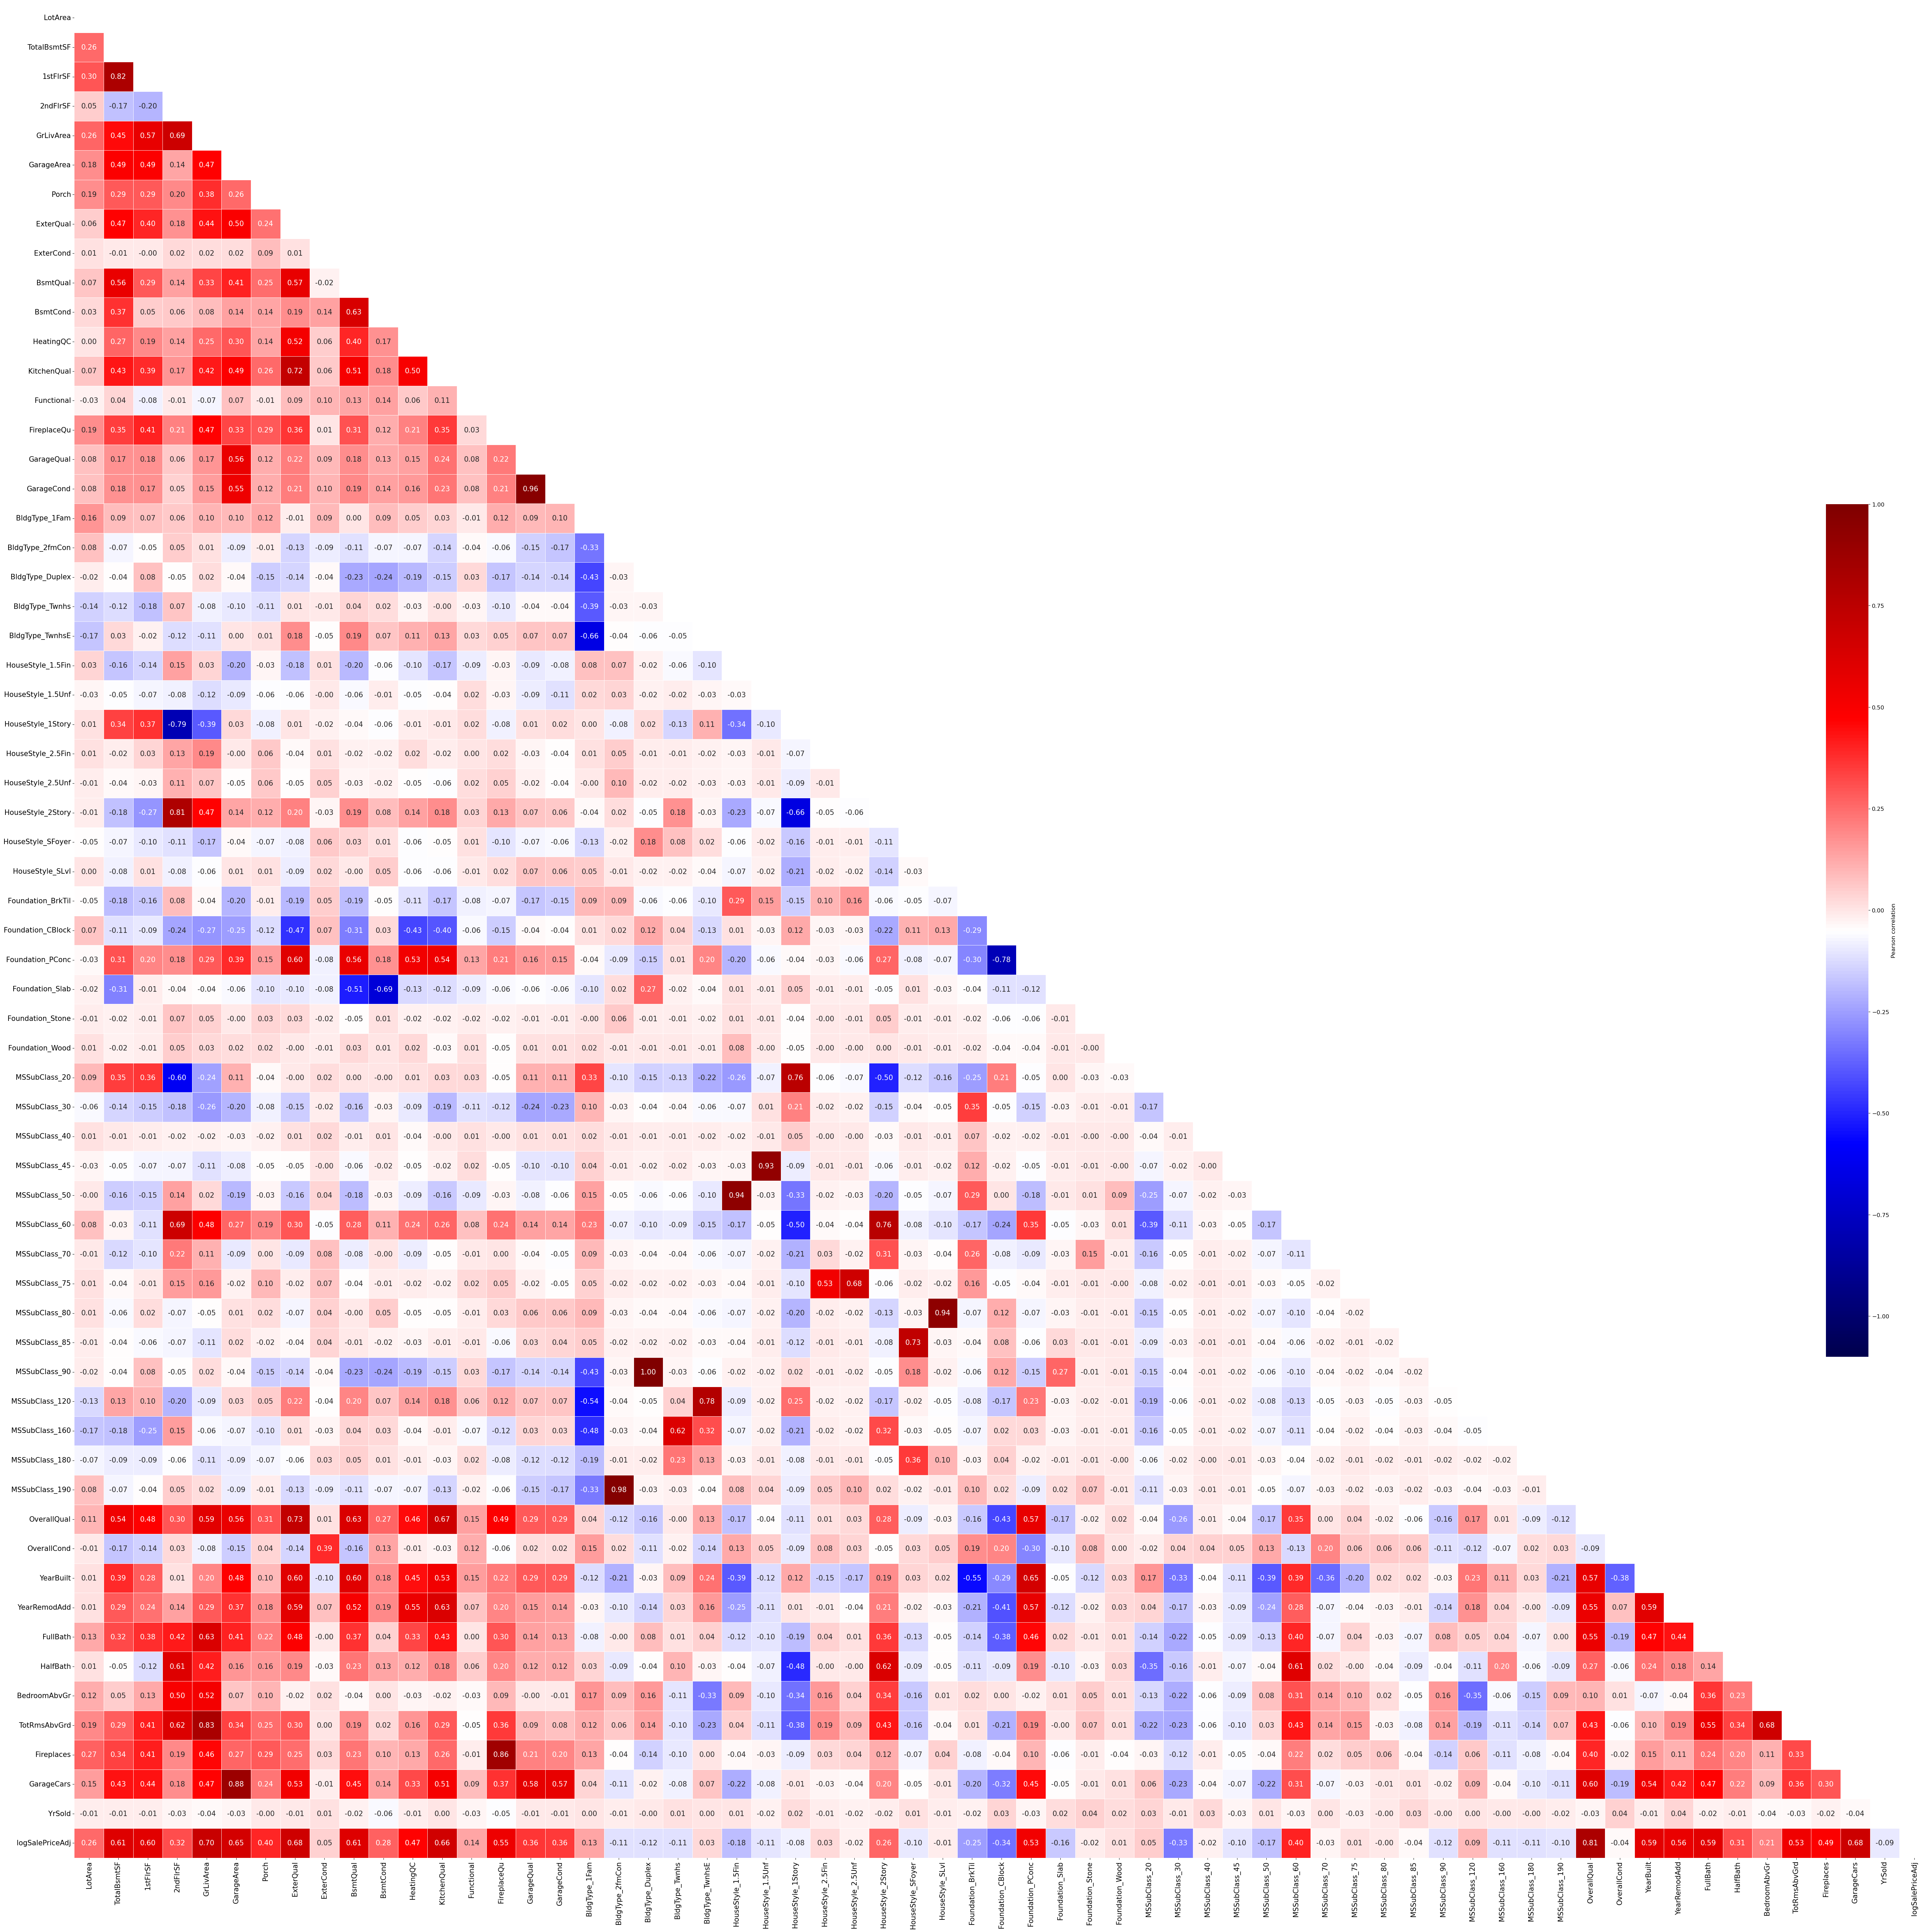

In [60]:
# remove all other price variables and Id for modeling
lm_houses = standard_houses.drop(['SalePrice', 'SalePriceAdj', 'Id'],axis=1)

# Calculate correlation matrix
corrmat = lm_houses.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(63, 63))
ax = sns.heatmap(corrmat, mask=np.triu(np.ones(corrmat.shape)).astype(bool),
                 cmap='seismic', vmax=-1, vmin=1,
                 annot=True, annot_kws={'size': 15.0},
                 fmt='.2f', square=True, linewidths=.5,
                 cbar_kws={'shrink': 0.4, 'pad': -0.05})

# Colorbar
cbar = ax.collections[0].colorbar
cbar.set_label(label='Pearson correlation',size=12)
cbar.ax.tick_params(labelsize=12)
cbar.solids.set_edgecolor("face")

# Ticks
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()
plt.show()

2. SalePrice is known to be associated with the size of the property. Create a scatterplot that shows the relationship between logSalePriceAdj and GrLivArea. If there are unusual sales observations, remove them.

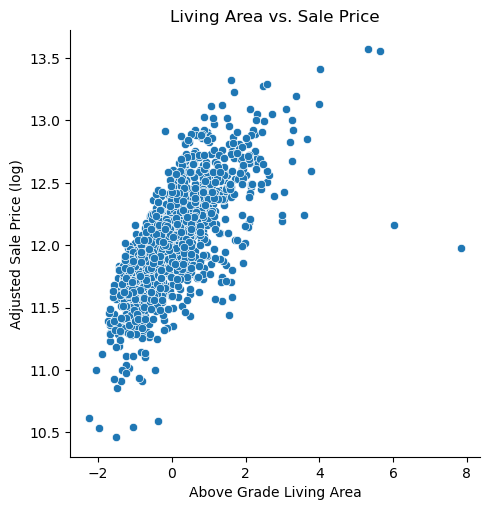

In [61]:
ax = sns.relplot(x='GrLivArea', y='logSalePriceAdj', data=lm_houses)
ax.set(xlabel = "Above Grade Living Area", ylabel = "Adjusted Sale Price (log)",
      title = "Living Area vs. Sale Price")
plt.show()

In [62]:
# see which two data points are the anomolies by seeing the points with the top 5 living area
standard_houses.sort_values(by=['GrLivArea'],ascending= False).head()

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,Porch,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Id,OverallQual,OverallCond,YearBuilt,YearRemodAdd,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,YrSold,SalePrice,SalePriceAdj,logSalePriceAdj
1298,5.348867,11.520949,9.132681,1.381844,7.855574,4.421526,2.073215,5.0,3.0,5.0,3.0,5.0,5.0,7.0,4.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1299,10,5,2008,2008,2,1,3,12,3,2,2008,160000,159431.125974,11.979367
523,2.964284,4.744149,5.111518,2.729297,6.016627,1.923065,2.762860,5.0,3.0,5.0,3.0,5.0,5.0,7.0,4.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,524,10,5,2007,2008,3,1,3,11,1,3,2007,184750,191160.648108,12.160869
1182,0.511751,3.052229,3.230317,3.936963,5.635892,1.590873,0.432117,4.0,3.0,5.0,3.0,5.0,5.0,7.0,3.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1183,10,5,1996,1996,3,1,4,10,2,3,2007,745000,770850.786687,13.555250
691,1.104264,3.161680,3.315709,3.494687,5.331304,1.679770,1.600681,5.0,3.0,5.0,3.0,5.0,5.0,7.0,5.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,692,10,6,1994,1995,3,1,4,10,2,3,2007,755000,781197.777112,13.568584
1169,2.529922,1.989649,1.729497,3.320526,4.019674,1.562800,1.632609,4.0,4.0,5.0,3.0,5.0,4.0,7.0,3.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1170,10,5,1995,1996,3,1,4,10,1,3,2006,625000,665134.760869,13.407745


From this scatterplot, we see two points that clearly do not follow the trend of the rest of the data. They have the two largest living areas, but have only slightly above average pricing. These points are identified by indexes 1298 and 523.

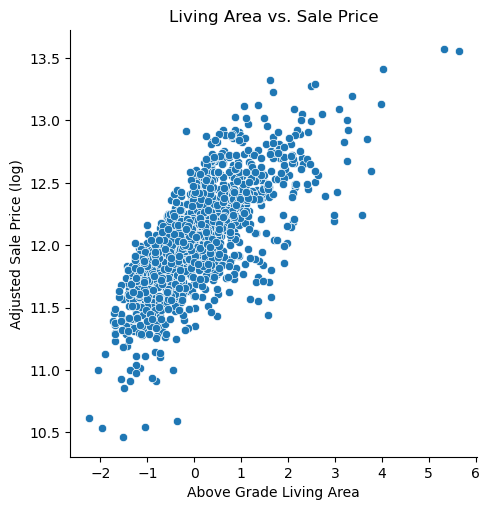

In [63]:
# drop problematic points
lm_houses2 = lm_houses.drop([1298, 523], axis=0)
# re plot data
ax = sns.relplot(x='GrLivArea', y='logSalePriceAdj', data=lm_houses2)
ax.set(xlabel = "Above Grade Living Area", ylabel = "Adjusted Sale Price (log)",
      title = "Living Area vs. Sale Price")
plt.show()

We can see that the problematic points have now been removed.

3. Split the dataset into 70% training and 30% test sets.

In [64]:
trainX, testX, trainy, testy = train_test_split(lm_houses2.iloc[:, 0:62], 
                                                lm_houses2.iloc[:, 62], 
                                                test_size=0.3, random_state=1)

4. Using scikit-learn, conduct the ridge, LASSO, and elastic net models to estimate logSalePriceAdj using all non-sale price variables. Implement appropriate cross validation and parameter tuning procedures. Carefully choose the parameter grid. Use the root mean squared error as the evaluation metric. Report 1) the coefficients, 2) tuned parameters, and 3) prediction errors of training set of the final models.

* Note: Your final model will be the one fitted with the tuned parameter(s) using the training set. 

**Ridge Regression**

In [65]:
# create a parameter grid
alphas = np.arange(0, 1, 0.01)
tuned_parameters = [{'alpha': alphas}]

# set the ridge and gridsearchcv objects
ridge = Ridge(random_state=1)
ridge_gscv = GridSearchCV(ridge, tuned_parameters, cv=10)
# fit the model
ridge_gscv.fit(trainX, trainy)
ridge_coefs = ridge_gscv.best_estimator_.coef_
ridge_intercept = ridge_gscv.best_estimator_.intercept_
ridge_bestparams = ridge_gscv.best_params_
ridge_pred = ridge_gscv.predict(trainX)
ridge_rmse = mean_squared_error(trainy, ridge_pred, squared=True)
print("Intercept: ", ridge_intercept)
print("Coefficients: ", ridge_coefs)
print("Parameters: ", ridge_bestparams)
print("RMSE: ", ridge_rmse)

Intercept:  50.94311213964308
Coefficients:  [ 0.03039434  0.05845766  0.04614364  0.0377093   0.09308905  0.00737891
  0.01949936  0.02091897 -0.02046431  0.01359338  0.00830275  0.0198306
  0.02501697  0.033758    0.00429354  0.02891049 -0.00314608  0.02386058
  0.02121519 -0.00161479 -0.03352417 -0.00993681 -0.01410639  0.03253697
  0.00400451 -0.03499146 -0.05472072 -0.02403611  0.03076639  0.06054681
 -0.00861979  0.00905723  0.02104956  0.07368582 -0.044834   -0.05033881
  0.01629409 -0.04399189 -0.00582597 -0.0116536   0.01225115  0.00037018
  0.07303772  0.04397802 -0.01675709  0.03844295 -0.00161479 -0.00593487
 -0.05309821 -0.05155747  0.00605979  0.05197889  0.04953354  0.00268633
  0.00047022  0.01479684  0.02976463 -0.01810334  0.00106244  0.03536114
  0.0371922  -0.0231054 ]
Parameters:  {'alpha': 0.99}
RMSE:  0.014272239628976722


**LASSO**

In [66]:
# set the lasso and gridsearchcv objects
lasso = Lasso(random_state=1)
lasso_gscv = GridSearchCV(lasso, tuned_parameters, cv=10)
# fit the model
lasso_gscv.fit(trainX, trainy)
lasso_coefs = lasso_gscv.best_estimator_.coef_
lasso_intercept = lasso_gscv.best_estimator_.intercept_
lasso_bestparams = lasso_gscv.best_params_
lasso_pred = lasso_gscv.predict(trainX)
lasso_rmse = mean_squared_error(trainy, lasso_pred, squared=True)
print("Intercept: ", lasso_intercept)
print("Coefficients: ", lasso_coefs)
print("Parameters: ", lasso_bestparams)
print("RMSE: ", lasso_rmse)

Intercept:  50.88248734924284
Coefficients:  [ 0.03014222  0.05887654  0.04153819  0.03520576  0.09870289  0.00697977
  0.01944838  0.02029654 -0.02139624  0.01520185  0.00826826  0.01996878
  0.024871    0.03378014  0.00425545  0.02904942 -0.00364413 -0.01695334
 -0.00310639 -0.03567056 -0.00442615  0.01704292 -0.01277256  0.06521835
  0.01728655 -0.08864801 -0.10527268 -0.02934101  0.05396878  0.10457135
 -0.02983284 -0.01177322 -0.00048718  0.06277714 -0.07743259 -0.12513151
  0.03023311 -0.03149229  0.00530443 -0.01822346  0.03605467  0.02740928
  0.10482681  0.1165633  -0.03475092  0.04351652  0.00552753 -0.05914658
 -0.0948015  -0.13220632  0.01083982  0.0511972   0.05009402  0.00268845
  0.00047543  0.01573307  0.03040847 -0.01888735  0.00160609  0.03507911
  0.03764699 -0.02306494]
Parameters:  {'alpha': 0.0}
RMSE:  0.014249352623677805


**Elastic Net**

In [67]:
# create a new tuning parameter grid with 2 parameters
enet_parameters = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}

# set the elastic net and gridsearchcv objects
enet = ElasticNet(random_state=1)
enet_gscv = GridSearchCV(enet, enet_parameters, cv=10)
# fit the model
enet_gscv.fit(trainX, trainy)
enet_coefs = enet_gscv.best_estimator_.coef_
enet_intercept = enet_gscv.best_estimator_.intercept_
enet_bestparams = enet_gscv.best_params_
enet_pred = enet_gscv.predict(trainX)
enet_rmse = mean_squared_error(trainy, enet_pred, squared=True)
print("Intercept: ", enet_intercept)
print("Coefficients: ", enet_coefs)
print("Parameters: ", enet_bestparams)
print("RMSE: ", enet_rmse)

Intercept:  50.185754424775624
Coefficients:  [ 0.03066129  0.05780974  0.03273185  0.01291679  0.11516697  0.00812521
  0.01933601  0.01795503 -0.01406311  0.01170547  0.00245843  0.01928832
  0.02535075  0.03415978  0.00485932  0.02544291  0.          0.02854331
  0.00905029  0.         -0.03097034 -0.00979454 -0.          0.
 -0.         -0.         -0.         -0.00167391  0.0026298   0.03011275
 -0.01195708 -0.          0.0106191   0.02997471 -0.         -0.
  0.01026255 -0.04076099 -0.          0.         -0.         -0.00618936
  0.04751982  0.          0.          0.04030931  0.         -0.
 -0.05475888 -0.          0.          0.05353836  0.04878492  0.00279254
  0.00050308  0.00758603  0.0224401  -0.01419856  0.00013971  0.03485309
  0.03678874 -0.02285377]
Parameters:  {'alpha': 0.001, 'l1_ratio': 0.3}
RMSE:  0.014402301582840985


5. Evaluate the three final models using the test set.

**Ridge Regression**

In [68]:
# make predictions using the test data
ridge_testpred = ridge_gscv.predict(testX)
ridge_testrmse = mean_squared_error(testy, ridge_testpred, squared=True)
print("RMSE: ", ridge_testrmse)

RMSE:  0.018277425355117397


**LASSO**

In [69]:
lasso_testpred = lasso_gscv.predict(testX)
lasso_testrmse = mean_squared_error(testy, lasso_testpred, squared=True)
print("RMSE: ", lasso_testrmse)

RMSE:  0.018369278176002826


**Elastic Net**

In [70]:
enet_testpred = enet_gscv.predict(testX)
enet_testrmse = mean_squared_error(testy, enet_testpred, squared=True)
print("RMSE: ", enet_testrmse)

RMSE:  0.018179045612943586


6. Use PCA to estimate logSalePriceAdj using all non-sale price variables. Select PCs that explain 95% of the variability and use them in PCA. Provide a brief expalantion about the selected PCs.

In [71]:
# run a PCA for the training data, keep PCs up to 95% variance explained
pca = PCA(n_components=0.95)
pca.fit(trainX)
pca.n_components_

2

In [72]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=trainX.columns)


In the first principal component, year built and year remodeled have the largest weight by a very sizeable margin. Both of these loadings are very negative. This doesn't make much sense, as we would expect the value of a home to increase as the year built and/or remodeled increases. The second principal component is similarly confusing, as year built is still largely negative, while year remodeled is largely positive. My hypothesis is that these data are acting strangely because they use a much larger scale than other numeric predictors. Note, sklearn's PCA automatically centers the data (makes the mean 0) but it does not scale the data (meaning standard deviation of 1) Therefore, differences in scales of predictors can largely skew results. All continuous predictors have been normalized, meaning they have a mean of 0 and a standard deviation of 1. Most other discrete predictors only vary by around 10 units, while years can vary by hundreds. The practice of normalizing discrete numeric predictors is contested, and because I have not been specified to do so I have chosen not to for this project. With all this being said, PCA is not a good approach given the nature of this data.

7. Evaluate the final model using the test set.

In [73]:
# perform PCA on test and train predictors
xtrain_reduced = pca.fit_transform(trainX)
xtest_reduced = pca.fit_transform(testX)
ols = LinearRegression()
# train a linear regression model using the PCA train data
ols.fit(xtrain_reduced, trainy)
# make predictions
ols_pred = ols.predict(xtest_reduced)
ols_coefs = ols.coef_
ols_intercept = ols.intercept_
ols_rmse = mean_squared_error(testy, ols_pred, squared=True)
print("Intercept: ", ols_intercept)
print("Coefficients: ", ols_coefs)
print("RMSE: ", ols_rmse)

Intercept:  12.049416932208867
Coefficients:  [-0.00776709  0.0032733 ]
RMSE:  0.09162123182196079


## Classification
1. We want to build a model that can predict if the house was remodeled or not. Create a variable Remodel, 1: remodeled and 0: not remodeled. What percentage of houses are remodeled?

In [74]:
lr_houses = lm_houses2
lr_houses['Remodel'] = 1
# assign 0 to remodel if the house has not been remodeled
lr_houses.loc[lr_houses['YearRemodAdd'] == lr_houses['YearBuilt'], 'Remodel'] = 0


2. Conduct the logistic regression to predict Remodel using SalePriceAdj and all non-sale price variables except for YearRemodAdd. You can use the same train/test split above or create a new split. Implement appropriate cross validation and parameter tuning procedures. Carefully choose the parameter grid. Report the coefficients, tuned parameters, and accuracy of training set of the final model.

In [75]:
# drop yearremodadd to do modeling
lr_houses2 = lr_houses.drop('YearRemodAdd', axis=1)
# create a stratified train test split
trainX, testX, trainy, testy = train_test_split(lr_houses2.iloc[:, 0:62], lr_houses2.iloc[:, 62], 
                                                test_size=0.3, random_state=1,
                                               stratify=lr_houses2.iloc[:, 62])

# create parameter grid
grid_params = {
  'penalty': ['l2'],
  'C': [0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]
}

# create log reg and gridsearchcv objects
lr = LogisticRegression()
lr_gscv = GridSearchCV(lr, grid_params, cv=10)

# fit model
lr_gscv.fit(trainX, trainy)
coefs = lr_gscv.best_estimator_.coef_
intercept = lr_gscv.best_estimator_.intercept_
bestparams = lr_gscv.best_params_
pred_y = lr_gscv.predict(testX)
accuracy = accuracy_score(testy, pred_y)
print("Intercept: ", intercept)
print("Coefficients: ", coefs)
print("Parameters: ", bestparams)
print("Accuracy:", accuracy)

Intercept:  [-0.00011841]
Coefficients:  [[-0.04003984 -0.07402183  0.09944958  0.12743133  0.20598036 -0.00124504
  -0.11563783  0.2426238  -0.004775    0.34894375 -0.13575066  0.61456457
   0.39533542 -0.38852601  0.08065424 -0.27641534 -0.28607209  0.12994523
  -0.01615832 -0.07208083 -0.01441812 -0.02740637  0.18932125  0.00668866
  -0.01780782  0.0063142   0.0092142  -0.04793746 -0.02574017 -0.12017128
   0.18654356 -0.61133321  0.39311732  0.01982459  0.00102291  0.01070642
  -0.14810293  0.17107181 -0.01016554  0.00539542  0.20261108 -0.06703981
   0.06682957  0.0124468  -0.10023879 -0.00726135 -0.07208083  0.04297762
  -0.06141636 -0.02448305 -0.01066206  0.05378145  0.56236347 -0.07724386
   0.20436864 -0.1550304  -0.34646095  0.18067911 -0.03122712  0.07603246
   0.07269424  0.08589203]]
Parameters:  {'C': 100, 'penalty': 'l2'}
Accuracy: 0.7054794520547946


3. Plot the ROC curve and compute the AUC.

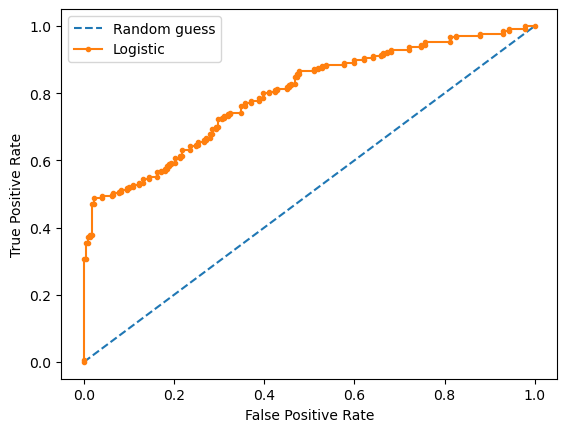

In [76]:
pred_probs = lr_gscv.predict_proba(testX)
pred_ones = pred_probs[:, 1]

# reference - random prediction
ns_probs = [0 for _ in range(len(testy))]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_ones)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random guess')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [77]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, pred_ones)
# summarize scores
print('Random guess: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Random guess: ROC AUC=0.500
Logistic: ROC AUC=0.795


4. Evaluate the final model using the test set.

In [78]:
# get model metrics
accuracy = accuracy_score(testy, pred_y)
precision = average_precision_score(testy, pred_ones)
recall = recall_score(testy, pred_y)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7054794520547946
Precision:  0.8220047746619197
Recall:  0.5598086124401914
